# World Happiness Report  for 2016 #
Dataset source: https://www.kaggle.com/datasets/unsdsn/world-happiness <br>
Dataset includes information gathered for the World Happiness Report survey for the year 2016.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#for predicting
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [65]:
#Load the data
df = pd.read_csv('2016.csv')

## Overview of the data ##
A look into the top and bottom 10 countries, along with where the United States ranks.

In [66]:
#top 10 counties
pd.DataFrame.head(df, 10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [67]:
#last 10 countries
pd.DataFrame.tail(df, 10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Madagascar,Sub-Saharan Africa,148,3.695,3.621,3.769,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075
148,Tanzania,Sub-Saharan Africa,149,3.666,3.561,3.771,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769
149,Liberia,Sub-Saharan Africa,150,3.622,3.463,3.781,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
150,Guinea,Sub-Saharan Africa,151,3.607,3.533,3.681,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
151,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [68]:
df.loc[df['Country'] == 'United States']

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
12,United States,North America,13,7.104,7.02,7.188,1.50796,1.04782,0.779,0.48163,0.14868,0.41077,2.72782


The United States ranks **12/157**, which is +3 improvement compared to the year before *(year 2015, ranked 15/158)*. **BUT**, there is an interesting change; the 2015 dataset has 158 countries, while the 2016 dataset has 157. What country in the 2016 dataset is missing in the 2015?

In [69]:
df2015=pd.read_csv("2015.csv")
whrdiff=[]

for i in list(df2015['Country']):
    if i not in list(df['Country']):
        whrdiff.append(i)
print(whrdiff)

['Oman', 'Somaliland region', 'Mozambique', 'Lesotho', 'Swaziland', 'Djibouti', 'Central African Republic']


This is clearly more than a 1 country difference, nevermind the fact that 'Somaliland region' is not a United Nations-recognized state (some Googling revealed that despite being recognized as the *de jure*  governemnt of Somalia, the 'Republic of Somaliland' is officially recognized only by Taiwan). So I figured that maybe there were some additions/deletions of countries being surveyed between 2015-2016, as well as some autonomous regions/unrecognized countries being included.

Below, I looked for any countries in the 2016 dataset that were not in the 2015 data.

In [70]:
whrdiff2=[]
for i in list(df['Country']):
    if i not in list(df2015['Country']):
        whrdiff2.append(i)
print(whrdiff2)

['Puerto Rico', 'Belize', 'Somalia', 'Somaliland Region', 'Namibia', 'South Sudan']


It appears that 'Somaliland Region' had a capitalization change, while some other countries replaced the 2016 data. Puerto Rico, which is not a sovergein nation but rather a US territory, is also surveyed.

## Boxplot (box and whisker) of the Happiness Scores ##
Individual scores per country per region are portrayed as black dots to show density and possible skewness.

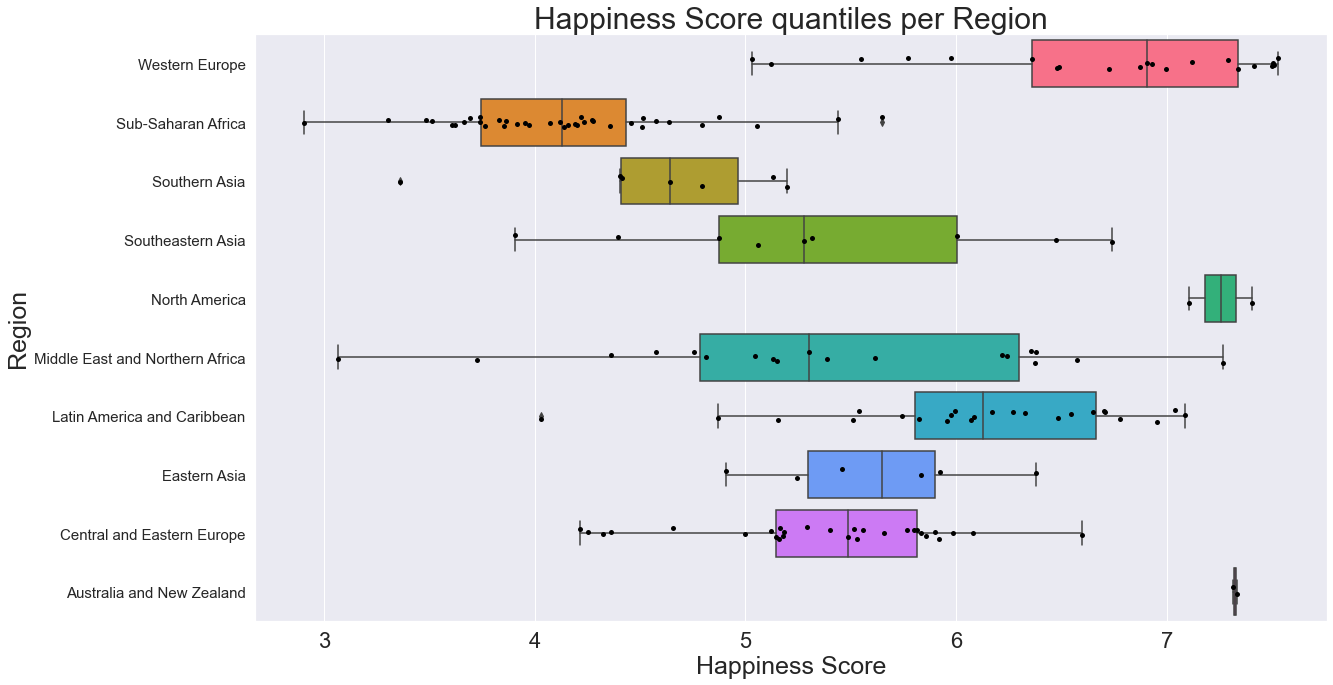

In [71]:
fig, axes = plt.subplots()
sns.set(rc={'figure.figsize':(19.2,10.8)}) #create dimension

#create list of countries to match the ordering on the 2015 R file
revreg = list(df['Region'])
rr1 = np.array(revreg)
rr2 = np.unique(revreg)
rr3 = list(rr2)
revreg2 = sorted(rr3, reverse=True)

#create boxplot, then create doplot(stripplot) on top of the previous
sns.boxplot(data=df, x=df['Happiness Score'], y=df['Region'], order=revreg2, palette='husl', saturation=1)
sns.stripplot(data=df, x=df['Happiness Score'], y=df['Region'], order=revreg2, color='black', size=5)
plt.ylabel('Region', fontsize=25)
plt.xlabel('Happiness Score', fontsize=25)
plt.title('Happiness Score quantiles per Region', fontsize=30)

#increase font of region ticks
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

Not too important, but I was not able to reverse the order of the colors for the box plots to match the order seen in my RMD file for the 2015 data.

## What is the average happiness score per region? ##

In [72]:
#groupby REGION, then find the mean of HAPPINESS SCORE by REGION, then sort the values by DESC
df.groupby(['Region']).mean().groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

Region
Australia and New Zealand          7.323500
North America                      7.254000
Western Europe                     6.685667
Latin America and Caribbean        6.101750
Eastern Asia                       5.624167
Middle East and Northern Africa    5.386053
Central and Eastern Europe         5.370690
Southeastern Asia                  5.338889
Southern Asia                      4.563286
Sub-Saharan Africa                 4.136421
Name: Happiness Score, dtype: float64

## Correlation matrix ##

<AxesSubplot:>

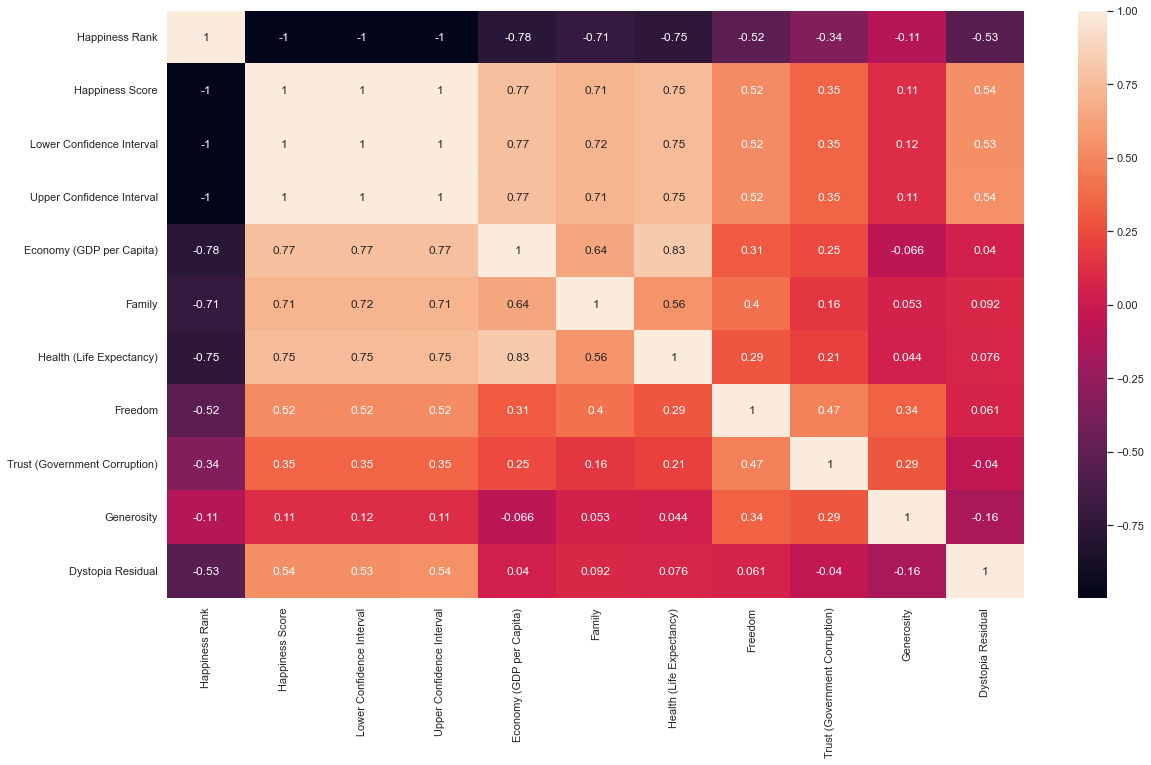

In [73]:
cmatrix = df[4:-1].corr()
sns.heatmap(cmatrix, annot=True)

Based on the values of the correlation matrix, **GDP** has the strongest positive relationship with **Happiness Score** at 0.77. Unlike last time, from the 2015 RMD file, where I graphed the relationship of the strongest correlation, this time I'll graph the weakest. Here, the weakest correlation for **Happiness Score** is the variable **Generosity**, which I'll graph below.

## Visualize the relationship from above ##

Graph of the relationship between variables **Generosity** and **Happiness Score**.

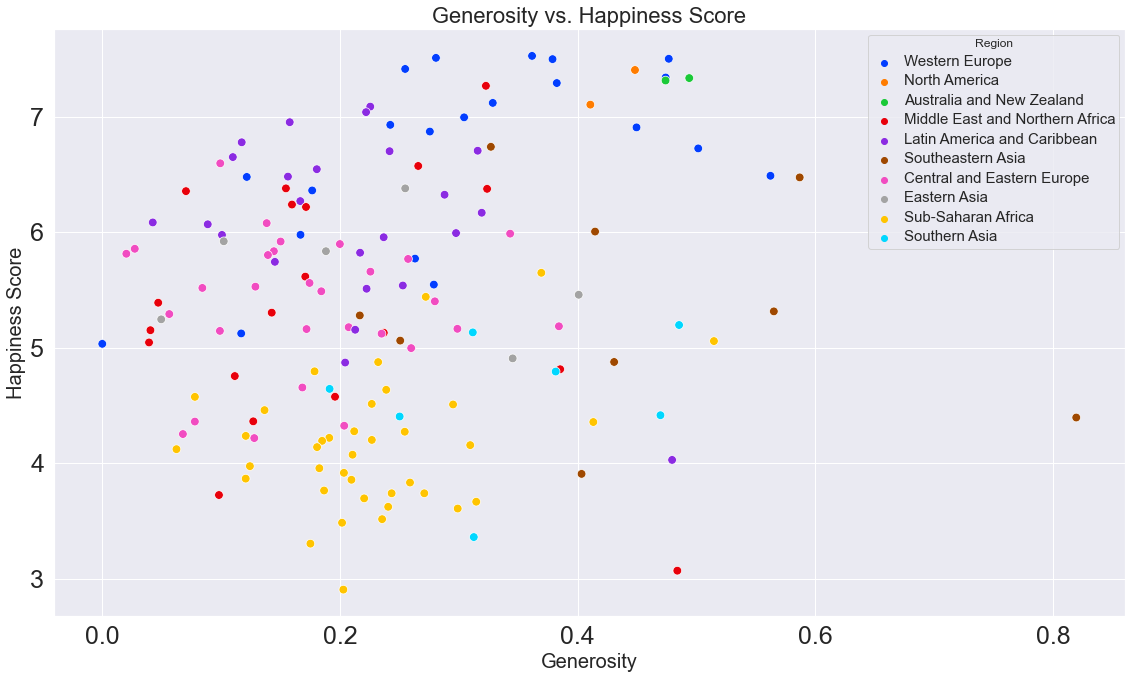

In [87]:
fig, axes = plt.subplots()
sns.scatterplot(data=df, x='Generosity', y='Happiness Score', hue='Region', s=75, palette='bright')

axes.xaxis.set_tick_params(labelsize=25)
axes.yaxis.set_tick_params(labelsize=25)
plt.xlabel('Generosity', fontsize=20)
plt.ylabel('Happiness Score', fontsize=20)
plt.title('Generosity vs. Happiness Score', fontsize=22)

plt.setp(axes.get_legend().get_texts(), fontsize='15')
plt.show()

There appears to be a *very* weak positive relationship between the 2 variables, but not strong enough to make a rule that a more generous country will be rewarded with a higher happiness score.

Interestingly, while some regions seem to cluster certain areas (*Sub-Saharan Africa* at the lower-left and *Central and Eastern Europe* at the middle-left, for example), other regions appear much more spread out (*Southeastern Asia* has more locations over the half-way mark of 0.4, yet happiness score is still around the same; *Western Europe* has some of the highest and lowest generosity scores).

## Create a model to predict a nation's happiness score ##